In [2]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Carga desde un archivo .csv sin indice
data21= pd.read_csv('gastos_costos_21.csv')

In [4]:
#Conocer estructura y eliminar columnas si es necesario
data21 = data21.drop(['Unnamed: 0'], axis=1)
data21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FECHA        3035 non-null   object 
 1   FOLIO        3035 non-null   object 
 2   UUID         3035 non-null   object 
 3   RFC          3035 non-null   object 
 4   PROVEEDOR    3035 non-null   object 
 5   TIPO GASTO   3035 non-null   object 
 6   DESCRIPCION  3035 non-null   object 
 7   MP           3035 non-null   object 
 8   TC           3035 non-null   float64
 9   IMPORTE      3035 non-null   float64
 10  IVA          3035 non-null   float64
 11  RET ISR      3035 non-null   float64
 12  RET IVA      3035 non-null   float64
 13  TOTAL MX     3035 non-null   float64
 14  TOTAL SAT    3035 non-null   float64
 15  TIPO         3035 non-null   object 
 16  STATUS       3035 non-null   object 
 17  POLIZA       3035 non-null   object 
dtypes: float64(7), object(11)
memory usage: 426.9+ K

In [5]:
#Filtrar por cuantitativas (Atipicos)
cuantitativas=data21.iloc[:,8:14]
cuantitativas

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX
0,1.0,490.00,78.40,0.0,0.0,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30
...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00


In [6]:
#Filtrar por cualitativas
cualitativas=data21.iloc[:,[0,1,2,3,4,5,6,7,15,16,17]]
cualitativas

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TIPO,STATUS,POLIZA
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,I,Vigente,0
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,I,Vigente,0
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,I,Vigente,0
...,...,...,...,...,...,...,...,...,...,...,...
3030,2021-12-01,127043,83F82167-0D14-144E-9D76-045C95F25DDD,PGM881128QIA,"PROMOCIONES GRAFICAS MEXICANAS, S.A. DE C.V.",PUBLICIDAD,Pago,SIN MUNICIPIO,P,Vigente,SIN POLIZA
3031,2021-12-01,11740,B1C60AE0-02BC-4A33-9513-A280F72B5D06,SME0510105C7,SPECTRIS MEXICO S DE RL DE CV,COMPRAS,INSULATED T/C WIRE,PUE,I,Vigente,SIN POLIZA
3032,2021-12-01,1092957089,255F4A25-5753-4208-8F6B-0B59E5AE4741,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,I,Vigente,SIN POLIZA
3033,2021-12-01,747826,D8226E4F-9241-44C3-86A4-CDE9BC932528,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,I,Vigente,SIN POLIZA


In [7]:
#Corroboramos valores nulos del dataframe
valores_nulos=data21.isnull().sum()
valores_nulos

,0
FECHA,0
FOLIO,0
UUID,0
RFC,0
PROVEEDOR,0
TIPO GASTO,0
DESCRIPCION,0
MP,0
TC,0
IMPORTE,0


In [8]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido TC              6.286851
IMPORTE     36154.569820
IVA          5464.876801
RET ISR       900.150092
RET IVA      1200.884906
TOTAL MX    40680.462408
dtype: float64
Limite inferior permitido TC             -3.981398
IMPORTE    -27625.812771
IVA         -4276.811367
RET ISR      -833.428945
RET IVA     -1053.848939
TOTAL MX   -31176.694132
dtype: float64


In [9]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data2021= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data2021

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX
0,1.0,490.00,78.40,0.0,0.0,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30
...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00


In [10]:
#Corroboramos valores nulos del dataframe
valores_nulos=data2021.isnull().sum()
valores_nulos

,0
TC,24
IMPORTE,43
IVA,38
RET ISR,32
RET IVA,81
TOTAL MX,40


In [11]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data2021.copy()
data_clean=data_clean.fillna(round(data2021.mean(),1))
data_clean

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX
0,1.0,490.00,78.40,0.0,0.0,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30
...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00


In [12]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

,0
TC,0
IMPORTE,0
IVA,0
RET ISR,0
RET IVA,0
TOTAL MX,0


<Figure size 1500x800 with 0 Axes>

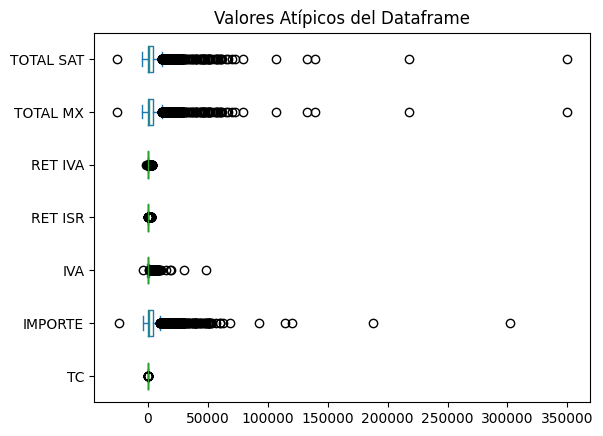

In [13]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe original
fig = plt.figure(figsize =(15, 8))
data21.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

<Figure size 1500x800 with 0 Axes>

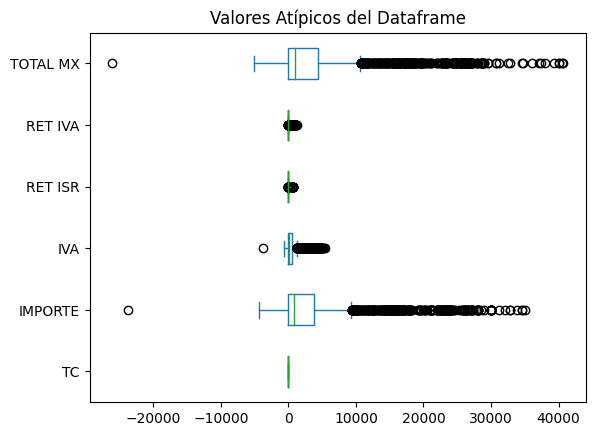

In [14]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe limpio
fig = plt.figure(figsize =(15, 8))
data_clean.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [15]:
#Unimos las columnas cualitativas con el dataframe
Datos_limpios = pd.concat([cualitativas, data_clean], axis=1)
Datos_limpios

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TIPO,STATUS,POLIZA,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,490.00,78.40,0.0,0.0,568.40
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,345.00,55.20,0.0,0.0,400.20
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,I,Vigente,0,1.0,3447.41,551.59,0.0,0.0,3999.00
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.38,888.22,0.0,0.0,6439.60
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.98,888.32,0.0,0.0,6440.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,2021-12-01,127043,83F82167-0D14-144E-9D76-045C95F25DDD,PGM881128QIA,"PROMOCIONES GRAFICAS MEXICANAS, S.A. DE C.V.",PUBLICIDAD,Pago,SIN MUNICIPIO,P,Vigente,SIN POLIZA,1.0,0.00,0.00,0.0,0.0,0.00
3031,2021-12-01,11740,B1C60AE0-02BC-4A33-9513-A280F72B5D06,SME0510105C7,SPECTRIS MEXICO S DE RL DE CV,COMPRAS,INSULATED T/C WIRE,PUE,I,Vigente,SIN POLIZA,1.0,0.00,0.00,0.0,0.0,0.00
3032,2021-12-01,1092957089,255F4A25-5753-4208-8F6B-0B59E5AE4741,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,I,Vigente,SIN POLIZA,1.0,22826.46,705.58,0.0,0.0,23532.04
3033,2021-12-01,747826,D8226E4F-9241-44C3-86A4-CDE9BC932528,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,I,Vigente,SIN POLIZA,1.0,0.00,0.00,0.0,0.0,0.00


In [16]:
#Convertir archivo filtrado a CSV
Datos_limpios.to_csv("Valores Atípicos (Gastos y costos 2021).csv")

In [17]:
#Descargar archivo en csv
from google.colab import files
files.download("Valores Atípicos (Gastos y costos 2021).csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>